# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression
    
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [89]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [90]:
#Reading data from remote link
url = "http://bit.ly/w-data"
st_data = pd.read_csv(url)
print("Data has imported successfully")

st_data.head(10)

Data has imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [91]:
st_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


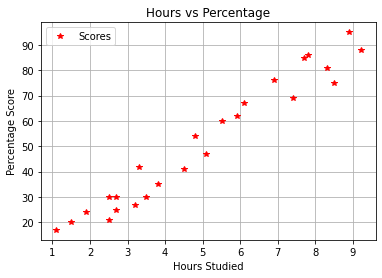

In [92]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='*',color='r')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()


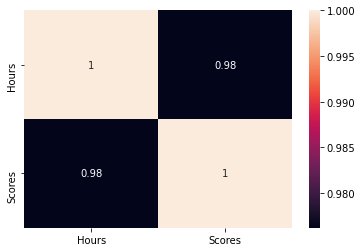

In [93]:
sns.heatmap(st_data.corr(),annot=True)

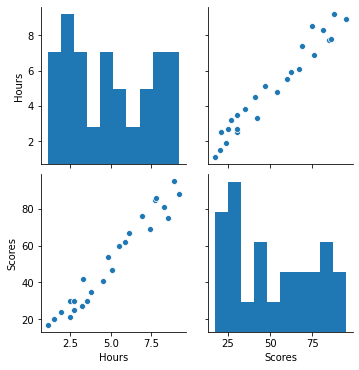

In [94]:
#Let's create some simple plots to check out the data!
sns.pairplot(st_data)

## Preparing the data
divide the data into "attributes" (inputs) and "labels" (outputs)

In [95]:
X = st_data.iloc[:, :-1].values  
y = st_data.iloc[:, 1].values  

In [96]:
#split this data into training and test sets using Scikit-Learn's built-in train_test_split() method
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 



In [97]:
#check the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(20, 1)
(5, 1)
(20,)
(5,)


## Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [103]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Training has been completed.")

Training has been completed.


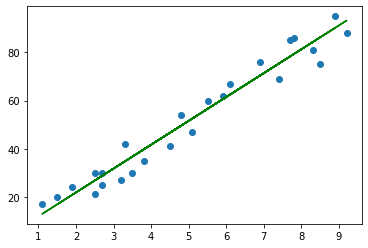

In [104]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_  #(y=mx+c)

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='g');
plt.show()

In [105]:
# Testing data - In Hours
print(X_test)
# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [106]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Testing Phase(hour = 9.25)
Prediction of a student who has study for 9.25 hrs in a day

In [107]:
hours = 9.25
own_pred = regressor.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [88]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
